In [4]:
import os, random
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from dGbyG.config import train_data_path
from dGbyG.utils.custom_tools import rapid_linear_reg

In [2]:
color1 = (100/256,170/256,220/256)
color2 = (241/256,183/256,39/256)
color3 = (162/256,205/256,133/256)
color4 = (256/256,130/256,210/256)
color5 = (139/256,139/256,255/256)

label_fs = 10
legend_fs = 10

In [3]:
def read_results(results_dir, N):
    # read the cross validation results files
    Final_p = []
    for n in range(N):
        name = os.path.join(results_dir, str(n))
        idx = np.load( name+'.npy').mean(axis=0).argmin()
        res = pd.read_csv(name+'.csv', index_col=0)
        try:
            real_r
        except:
            real_r = res.loc[:,'standard_dg_prime'].to_numpy()
        assert np.isclose(real_r, res.loc[:,'standard_dg_prime']).all()
        
        Final_p.append(res.loc[:,str(idx)].to_numpy())

    Final_p = np.asarray(Final_p)
    Final_e = Final_p - np.expand_dims(real_r, axis=0)
    Final_ae = np.abs(Final_e)

    return real_r, Final_p, Final_e, Final_ae

def calculate_statistics(real_r, Final_p):
    # 
    p = np.nanmean(Final_p, axis=0)
    e = p - real_r
    ae = np.abs(e)

    median_ae = np.nanmedian(ae)
    mean_ae = np.nanmean(ae)
    rmse = np.nanmean(ae**2)**0.5

    print('Medain of absolute error:', median_ae)
    print('Mean of absolute error:', mean_ae)
    print('RMSE:', rmse)

    return real_r, p


10-fold cross validation results

In [4]:
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation/'
real_r, Final_p, Final_e, Final_ae = read_results(results_dir, 100)
real_r, p = calculate_statistics(real_r, Final_p)
py, pr, sr = rapid_linear_reg(real_r, p)

Medain of absolute error: 4.114922286681738
Mean of absolute error: 9.176303647069096
RMSE: 25.88301495877343
The linear model is: Y = -1.8518 + 0.99454X
PearsonRResult(statistic=0.9973365986965272, pvalue=0.0)
SignificanceResult(statistic=0.9308097362929517, pvalue=2.214542057331344e-296)


10-fold cross validation results of unweighing

In [5]:
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation_unweighing/'
real_r_unweigh, Final_p_unweigh, Final_e_unweigh, Final_ae_unweigh = read_results(results_dir, 100)
real_r_unweigh, p_unweigh = calculate_statistics(real_r_unweigh, Final_p_unweigh)
py_unweigh, pr_unweigh, sr_unweigh = rapid_linear_reg(real_r_unweigh, p_unweigh)

Medain of absolute error: 4.1548656037964555
Mean of absolute error: 9.006125081380704
RMSE: 25.991738989842275
The linear model is: Y = -1.1647 + 0.99488X
PearsonRResult(statistic=0.9973087939284642, pvalue=0.0)
SignificanceResult(statistic=0.9207210825562423, pvalue=2.9911316705924e-277)


10-fold cross validation results without random error

In [6]:
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation_without_random_dG/'
real_r_no_rand, Final_p_no_rand, Final_e_no_rand, Final_ae_no_rand = read_results(results_dir, 100)
real_r_no_rand, p_no_rand = calculate_statistics(real_r_no_rand, Final_p_no_rand)
py_no_rand, pr_no_rand, sr_no_rand = rapid_linear_reg(real_r_no_rand, p_no_rand)

Medain of absolute error: 4.149462700000015
Mean of absolute error: 8.674818705608297
RMSE: 24.675103667821514
The linear model is: Y = -1.4557 + 0.99512X
PearsonRResult(statistic=0.9975771302767866, pvalue=0.0)
SignificanceResult(statistic=0.9310953025752948, pvalue=5.785717240003189e-297)


10-fold cross validation results of unweighing and without random error

In [7]:
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation_unweighing_without_random_dG/'
real_r_unweigh_no_rand, Final_p_unweigh_no_rand, Final_e_unweigh_no_rand, Final_ae_unweigh_no_rand = read_results(results_dir, 100)
real_r_unweigh_no_rand, p_unweigh_no_rand = calculate_statistics(real_r_unweigh_no_rand, Final_p_unweigh_no_rand)
py_unweigh_no_rand, pr_unweigh_no_rand, sr_unweigh_no_rand = rapid_linear_reg(real_r, p)

Medain of absolute error: 4.2178460000000655
Mean of absolute error: 8.929575854514079
RMSE: 25.357022850582986
The linear model is: Y = -1.8518 + 0.99454X
PearsonRResult(statistic=0.9973365986965272, pvalue=0.0)
SignificanceResult(statistic=0.9308097362929517, pvalue=2.214542057331344e-296)


Fig 2. a

In [8]:
def resample_median(x, k, n):
    # randomly select k samples from x, repeating n times
    def resample(x, k):
        y = x[np.random.randint(0, x.shape[0], k)]
        y = np.mean(y, axis=0)
        return y
    e = np.array([resample(x, k) for _ in range(n)]) - real_r
    mae = np.median(np.abs(e), axis=1) # shape=(n,)
    return mae

k, n = 20, 5

data = [Final_p_unweigh_no_rand, Final_p_unweigh, Final_p_no_rand, Final_p]#
#data = [resample_median(x, k, n) for x in data]
data = [[np.median(np.abs(np.mean(x[i:i+k], axis=0)-real_r)) for i in range(n)] for x in data]

[4.196941362866349, 4.2167375128294555, 4.0958977847058575, 4.128876347433721]
0 1
LeveneResult(statistic=1.8111623286425327, pvalue=0.21526171343404138)
Ttest_indResult(statistic=-0.8860513255332859, pvalue=0.4014385757006076)

0 2
LeveneResult(statistic=3.040049967001689, pvalue=0.11939397247705257)
Ttest_indResult(statistic=3.6497487297164146, pvalue=0.006496724377186252)

0 3
LeveneResult(statistic=0.14297432590805406, pvalue=0.7151777604957334)
Ttest_indResult(statistic=4.031976598572219, pvalue=0.0037776553004447307)

1 2
LeveneResult(statistic=0.23589434277333715, pvalue=0.6402099236032895)
Ttest_indResult(statistic=3.62594718121186, pvalue=0.006724391980900484)

1 3
LeveneResult(statistic=0.6898273959400026, pvalue=0.43031079971489367)
Ttest_indResult(statistic=3.5028000845758642, pvalue=0.008045998024743558)

2 3
LeveneResult(statistic=1.5797408663709789, pvalue=0.24425229055226672)
Ttest_indResult(statistic=-1.101452473392952, pvalue=0.30273221635492464)



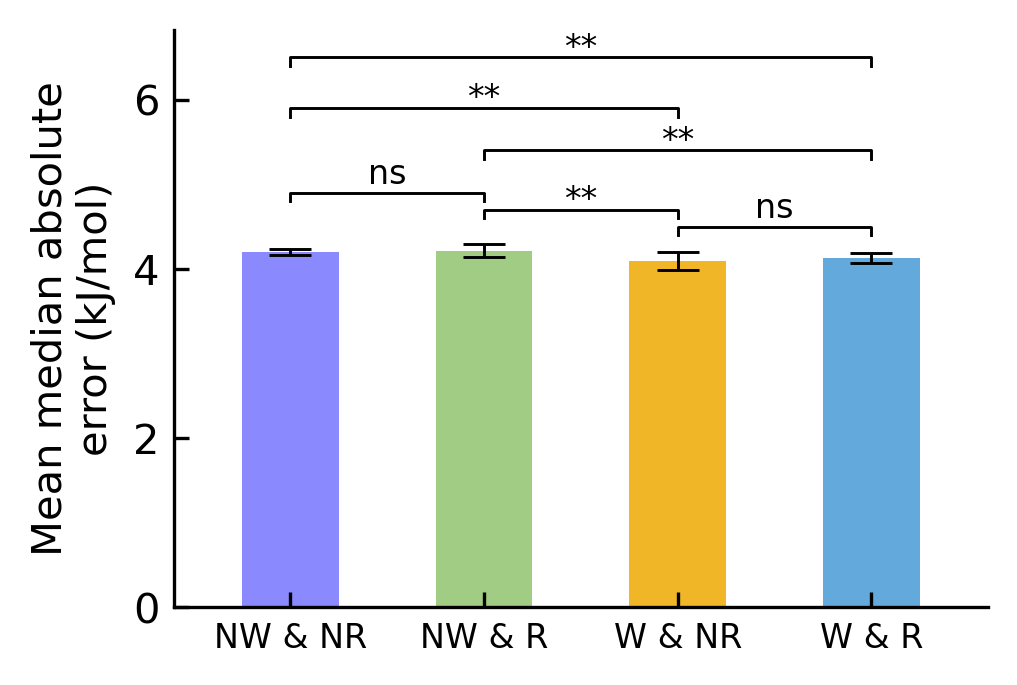

In [9]:
plt.figure(dpi=300,figsize = (3.5,2.5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

err_params=dict(elinewidth=0.7, ecolor='black', capsize=5, capthick=0.7)

height=[np.mean(x) for x in data]
yerr=[np.std(x)*1.96 for x in data]
print(height)

colors = [color5, color3, color2, color1]
labels = ['NW & NR', 'NW & R', 'W & NR', 'W & R']

plt.bar(x=[0,1,2,3],height=height, width=0.5, edgecolor='none', color=colors, 
        yerr=yerr, error_kw=err_params)


for x in range(len(data)):
    for y in range(x+1, len(data)):
        ttest = scipy.stats.ttest_ind(data[x], data[y])
        dh = 0.1
        if ttest[1]>0.05:
            sign = 'ns'
            dh = 0.2
        elif ttest[1]>0.01:
            sign = '*'
        elif ttest[1]>0.001:
            sign = '**'
        else:
            sign = '***'
        print(x,y)
        print(scipy.stats.levene(data[x], data[y]))
        print(ttest)
        print()
        h = 4.8-x/5 if (y-x)==1 else 4.2-x/5*2.5+(y-x)*0.8-(y-x-2)*0.2

        plt.plot([x,x,y,y], [h,h+0.1,h+0.1,h], c='black', linewidth=0.7)
        plt.text(x=0.5*(y+x), y=h+dh, s=sign, fontsize=8, ha='center')

plt.xticks(ticks=[0,1,2,3], labels=labels, fontsize=8)
plt.yticks(fontsize=10)

plt.ylabel('Mean median absolute\nerror (kJ/mol)', fontsize=10, labelpad=4)

plt.xlim(-0.6,3.6)
plt.show()

The linear model is: Y = -1.8518 + 0.99454X
PearsonRResult(statistic=0.9973365986965272, pvalue=0.0)
SignificanceResult(statistic=0.9308097362929517, pvalue=2.214542057331344e-296)


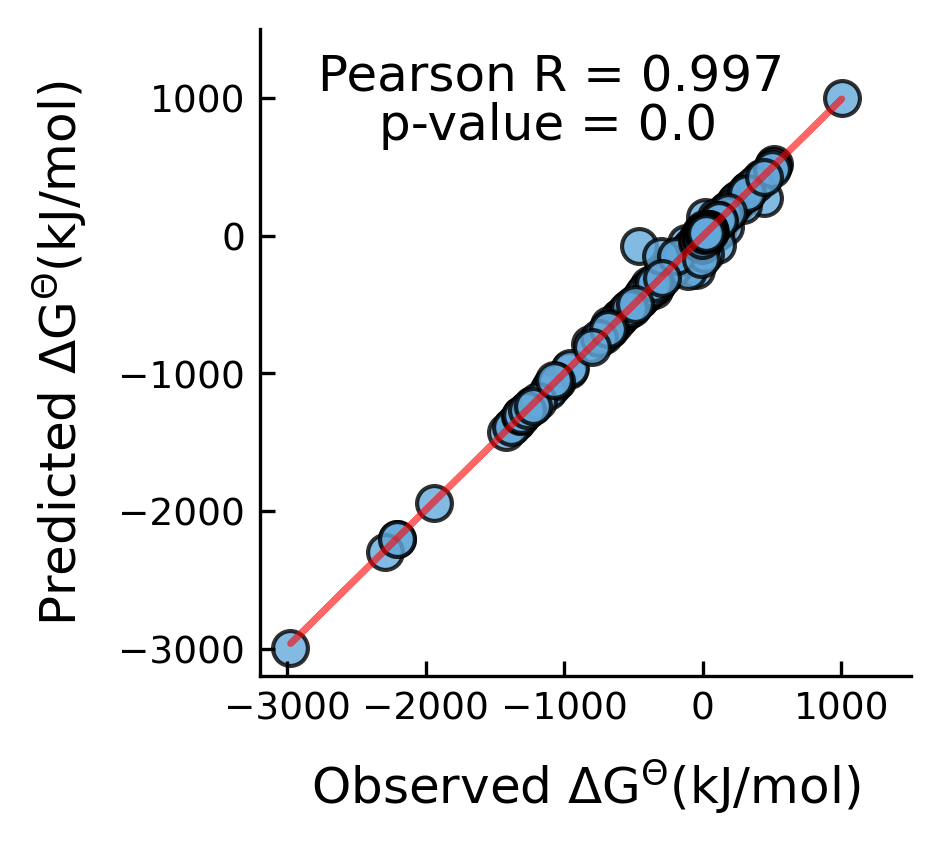

In [10]:
x = real_r
y = p
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.figure(dpi=300, figsize=(2.8,2.8))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
lable_fs = 17
title_fs = 20

plt.scatter(x, y, color=color1, marker='o', alpha=0.8, edgecolors='black', s=70)
plt.plot(x, fit_y,c = 'red',linewidth=1.6 , alpha = 0.6)

plt.text(x=-2780, y=1050, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 12)
plt.text(x=-2335, y=700, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 12)

plt.xticks(range(-3000, 1300, 1000), fontsize=9)
plt.yticks(range(-3000, 1300, 1000), fontsize=9)

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=12, labelpad=7)
plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=12, labelpad=7)

plt.ylim(-3200,1500)
plt.xlim(-3200,1500)
plt.show()

Reading the cross validation results data of CC method and AF method

In [11]:
# CC method
cc = pd.read_csv('../data/results_data/cc_and_af/cc.csv', index_col=0)
np.load('../data/results_data/cc_and_af/cc_loocv.npz')
cc_r = cc['r']
cc_p = cc['LOOCV']
cc_e = cc_p-cc_r
cc_ae = np.abs(cc_e)
print('eQuilibrator:')
fit_y, pr, sr = rapid_linear_reg(cc_r, cc_p)
print('Medain of absolute error:', np.median(cc_ae))
print('Mean of absolute error:', np.mean(cc_ae))
print('RMSE:', np.mean(cc_ae**2)**0.5)

# AF method
af = pd.read_csv('../data/results_data/cc_and_af/af.csv', index_col=0)
af_r = af['r']
af_p = af['LOOCV']
af_e = af_p-af_r
af_ae = np.abs(af_e)
print()
print('dGpredictor:')
fit_y, pr, sr = rapid_linear_reg(af_r, af_p)
print('Medain of absolute error:', np.median(af_ae))
print('Mean of absolute error:', np.mean(af_ae))
print('RMSE:', np.mean(af_ae**2)**0.5)

eQuilibrator:
The linear model is: Y = 3.7288 + 0.99063X
PearsonRResult(statistic=0.9830222548133831, pvalue=0.0)
SignificanceResult(statistic=0.916444769913568, pvalue=1.727167078083592e-271)
Medain of absolute error: 5.352046536935764
Mean of absolute error: 19.459797295222018
RMSE: 82.8779944575117

dGpredictor:
The linear model is: Y = 0.49928 + 0.99274X
PearsonRResult(statistic=0.9942639835605215, pvalue=0.0)
SignificanceResult(statistic=0.9106370386287613, pvalue=4.706066533365749e-262)
Medain of absolute error: 5.484989593132767
Mean of absolute error: 16.256106507029905
RMSE: 47.84693467009186


Fig 2.

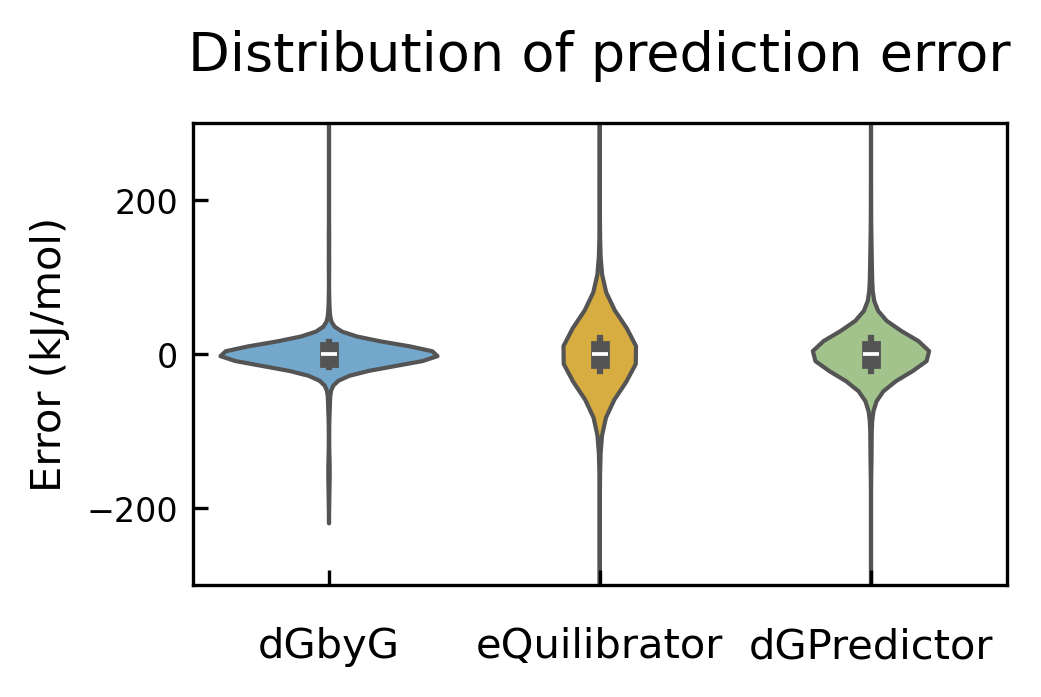

In [12]:
df1 = pd.DataFrame(data={'e':p-real_r, 'tool':'dGbyG'})
df2 = pd.DataFrame(data={'e':cc_e, 'tool':'eQuilibrator'})
df3 = pd.DataFrame(data={'e':af_e, 'tool':'dGPredictor'})
df = pd.concat([df1,df2,df3], axis=0, ignore_index=True)

plt.figure(dpi=300,figsize = (3.5,2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax= plt.axes()
ax.xaxis.set_tick_params(pad=10)

plt.title(label='Distribution of prediction error', fontsize=13, x=0.5, y=1.06)
sns.violinplot(data=df, x='tool', y='e', hue='tool', palette=[color1, color2, color3], 
               bw_adjust=1.8, common_norm=True, linewidth=1, inner='box')
plt.yticks(fontsize = 8)
plt.xticks(ticks=[0,1,2],labels=['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize=10)

plt.ylabel('Error (kJ/mol)', fontsize=10)
plt.xlabel('')

plt.ylim(-300,300)
plt.show()

Fig 2.

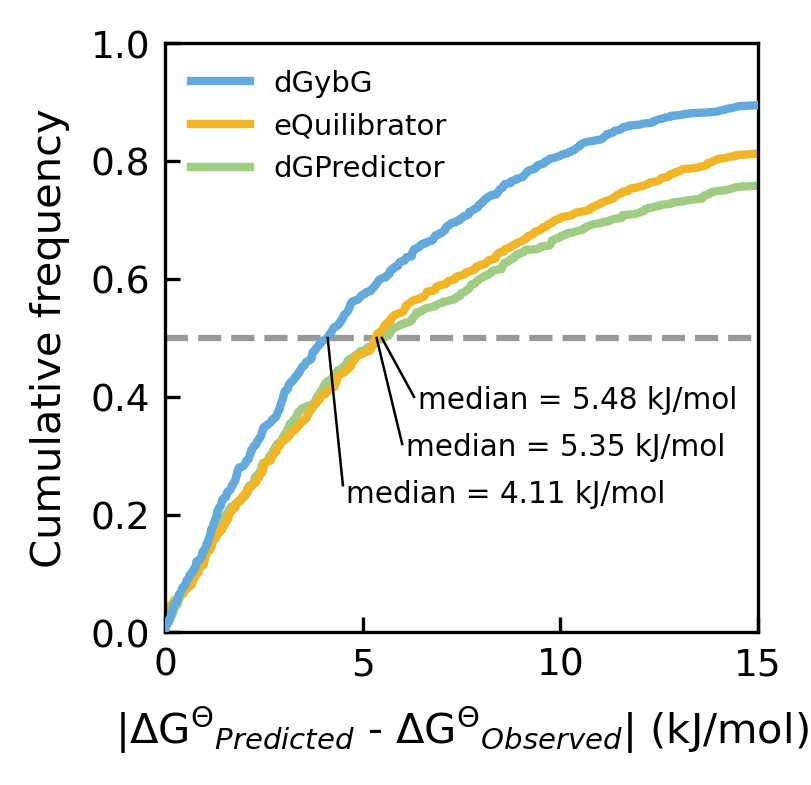

In [13]:
ae_sort = np.abs(p-real_r)#.to_numpy()
ae_sort.sort()
density = np.arange(1,len(ae_sort)+1)/len(ae_sort)

cc_ae_sort = cc_ae.to_numpy()
cc_ae_sort.sort()
cc_density = np.arange(1,len(cc_ae_sort)+1)/len(cc_ae_sort)

af_ae_sort = af_ae.to_numpy()
af_ae_sort.sort()
af_density = np.arange(1,len(af_ae_sort)+1)/len(af_ae_sort)

plt.figure(dpi=300, figsize=(2.55,2.55))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.title(label='Cumulative distributions of\nabsolute prediction error', fontsize=10, x=0.5, y=1.01)

# dgbyg
l0, = plt.plot(ae_sort, density, linewidth=2, c=color1, zorder = 3, label='dGybG')
plt.plot([np.median(ae_sort),4.5], [0.5,0.25], linewidth =0.6, color = 'black', zorder=4)
plt.text(x=4.59, y = 0.22, s='median = {0} kJ/mol'.format(np.around(np.median(ae_sort), decimals=2)), fontsize=7.1)

# cc
l1, = plt.plot(cc_ae_sort, cc_density, linewidth=2, c=color2, zorder=2, label='eQuilibrator')
plt.plot([np.median(cc_ae),6], [0.5,0.32], linewidth=0.6, color='black', zorder=4)
plt.text(x = 6.09, y = 0.30, s='median = {0} kJ/mol'.format(np.around(np.median(cc_ae_sort), decimals=2)), fontsize=7.1)

# dGPredictor
l2, = plt.plot(af_ae_sort, af_density, linewidth=2, c=color3, zorder = 1, label='dGPredictor')
plt.plot([np.median(af_ae),6.3], [0.5,0.40], linewidth =0.6, color = 'black', zorder=4)
plt.text(x = 6.39, y = 0.38, s='median = {0} kJ/mol'.format(np.around(np.median(af_ae_sort), decimals=2)), fontsize=7.1)

plt.axhline(y=0.5, c = 'gray', linestyle = '--', linewidth=1.5, zorder=0, alpha=0.8)

plt.legend(handles=[l0,l1,l2], fontsize=7, frameon=False, )

plt.xlabel(r'|$\Delta$G$^{0}$$_{1}$ - $\Delta$G$^{0}$$_{2}$| (kJ/mol)'.format(chr(920),'{Predicted}', '{Observed}'), fontsize=10, labelpad=5)
plt.ylabel(r'Cumulative frequency', fontsize=10, labelpad=5)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.xlim(0,15)
plt.ylim(0,1)
plt.show()

Fig 3.

In [14]:
results_dir = '../data/results_data/cross_validation_results/5_fold_cross_validation/'
real_r_5, Final_p_5, Final_e_5, Final_ae_5 = read_results(results_dir, 20)
real_r_5, p_5 = calculate_statistics(real_r_5, Final_p_5)
py_5, pr_5, sr_5 = rapid_linear_reg(real_r_5, p_5)

Medain of absolute error: 4.1964276365077655
Mean of absolute error: 8.777830465990094
RMSE: 25.361118619022392
The linear model is: Y = -1.8448 + 0.99461X
PearsonRResult(statistic=0.9974433767314574, pvalue=0.0)
SignificanceResult(statistic=0.9265248558553191, pvalue=6.3639523960539324e-288)


In [15]:
results_dir = '../data/results_data/cross_validation_results/2_fold_cross_validation/'
real_r_2, Final_p_2, Final_e_2, Final_ae_2 = read_results(results_dir, 20)
real_r_2, p_2 = calculate_statistics(real_r_2, Final_p_2)
py_2, pr_2, sr_2 = rapid_linear_reg(real_r_2, p_2)

Medain of absolute error: 5.016988999999967
Mean of absolute error: 10.106832240406911
RMSE: 26.321188780034376
The linear model is: Y = -1.7415 + 0.99547X
PearsonRResult(statistic=0.9972454949694598, pvalue=0.0)
SignificanceResult(statistic=0.9134914115650207, pvalue=4.808301623312359e-265)


The linear model is: Y = -1.8518 + 0.99454X
PearsonRResult(statistic=0.9973365986965272, pvalue=0.0)
SignificanceResult(statistic=0.9308097362929517, pvalue=2.214542057331344e-296)
The linear model is: Y = -1.8448 + 0.99461X
PearsonRResult(statistic=0.9974433767314574, pvalue=0.0)
SignificanceResult(statistic=0.9265248558553191, pvalue=6.3639523960539324e-288)
The linear model is: Y = -1.7415 + 0.99547X
PearsonRResult(statistic=0.9972454949694598, pvalue=0.0)
SignificanceResult(statistic=0.9134914115650207, pvalue=4.808301623312359e-265)
The linear model is: Y = -3.7309e+11 + 3.245e+08X
PearsonRResult(statistic=0.021226238011239084, pvalue=0.5808465924765888)
SignificanceResult(statistic=0.8553350026142384, pvalue=1.5780057876145426e-195)
The linear model is: Y = -1.764e+11 + 4.1682e+08X
PearsonRResult(statistic=0.027605458755932146, pvalue=0.4726683309367915)
SignificanceResult(statistic=0.6887982870359016, pvalue=1.1952972731268794e-96)
The linear model is: Y = -1.131e+12 + -1.0732e+

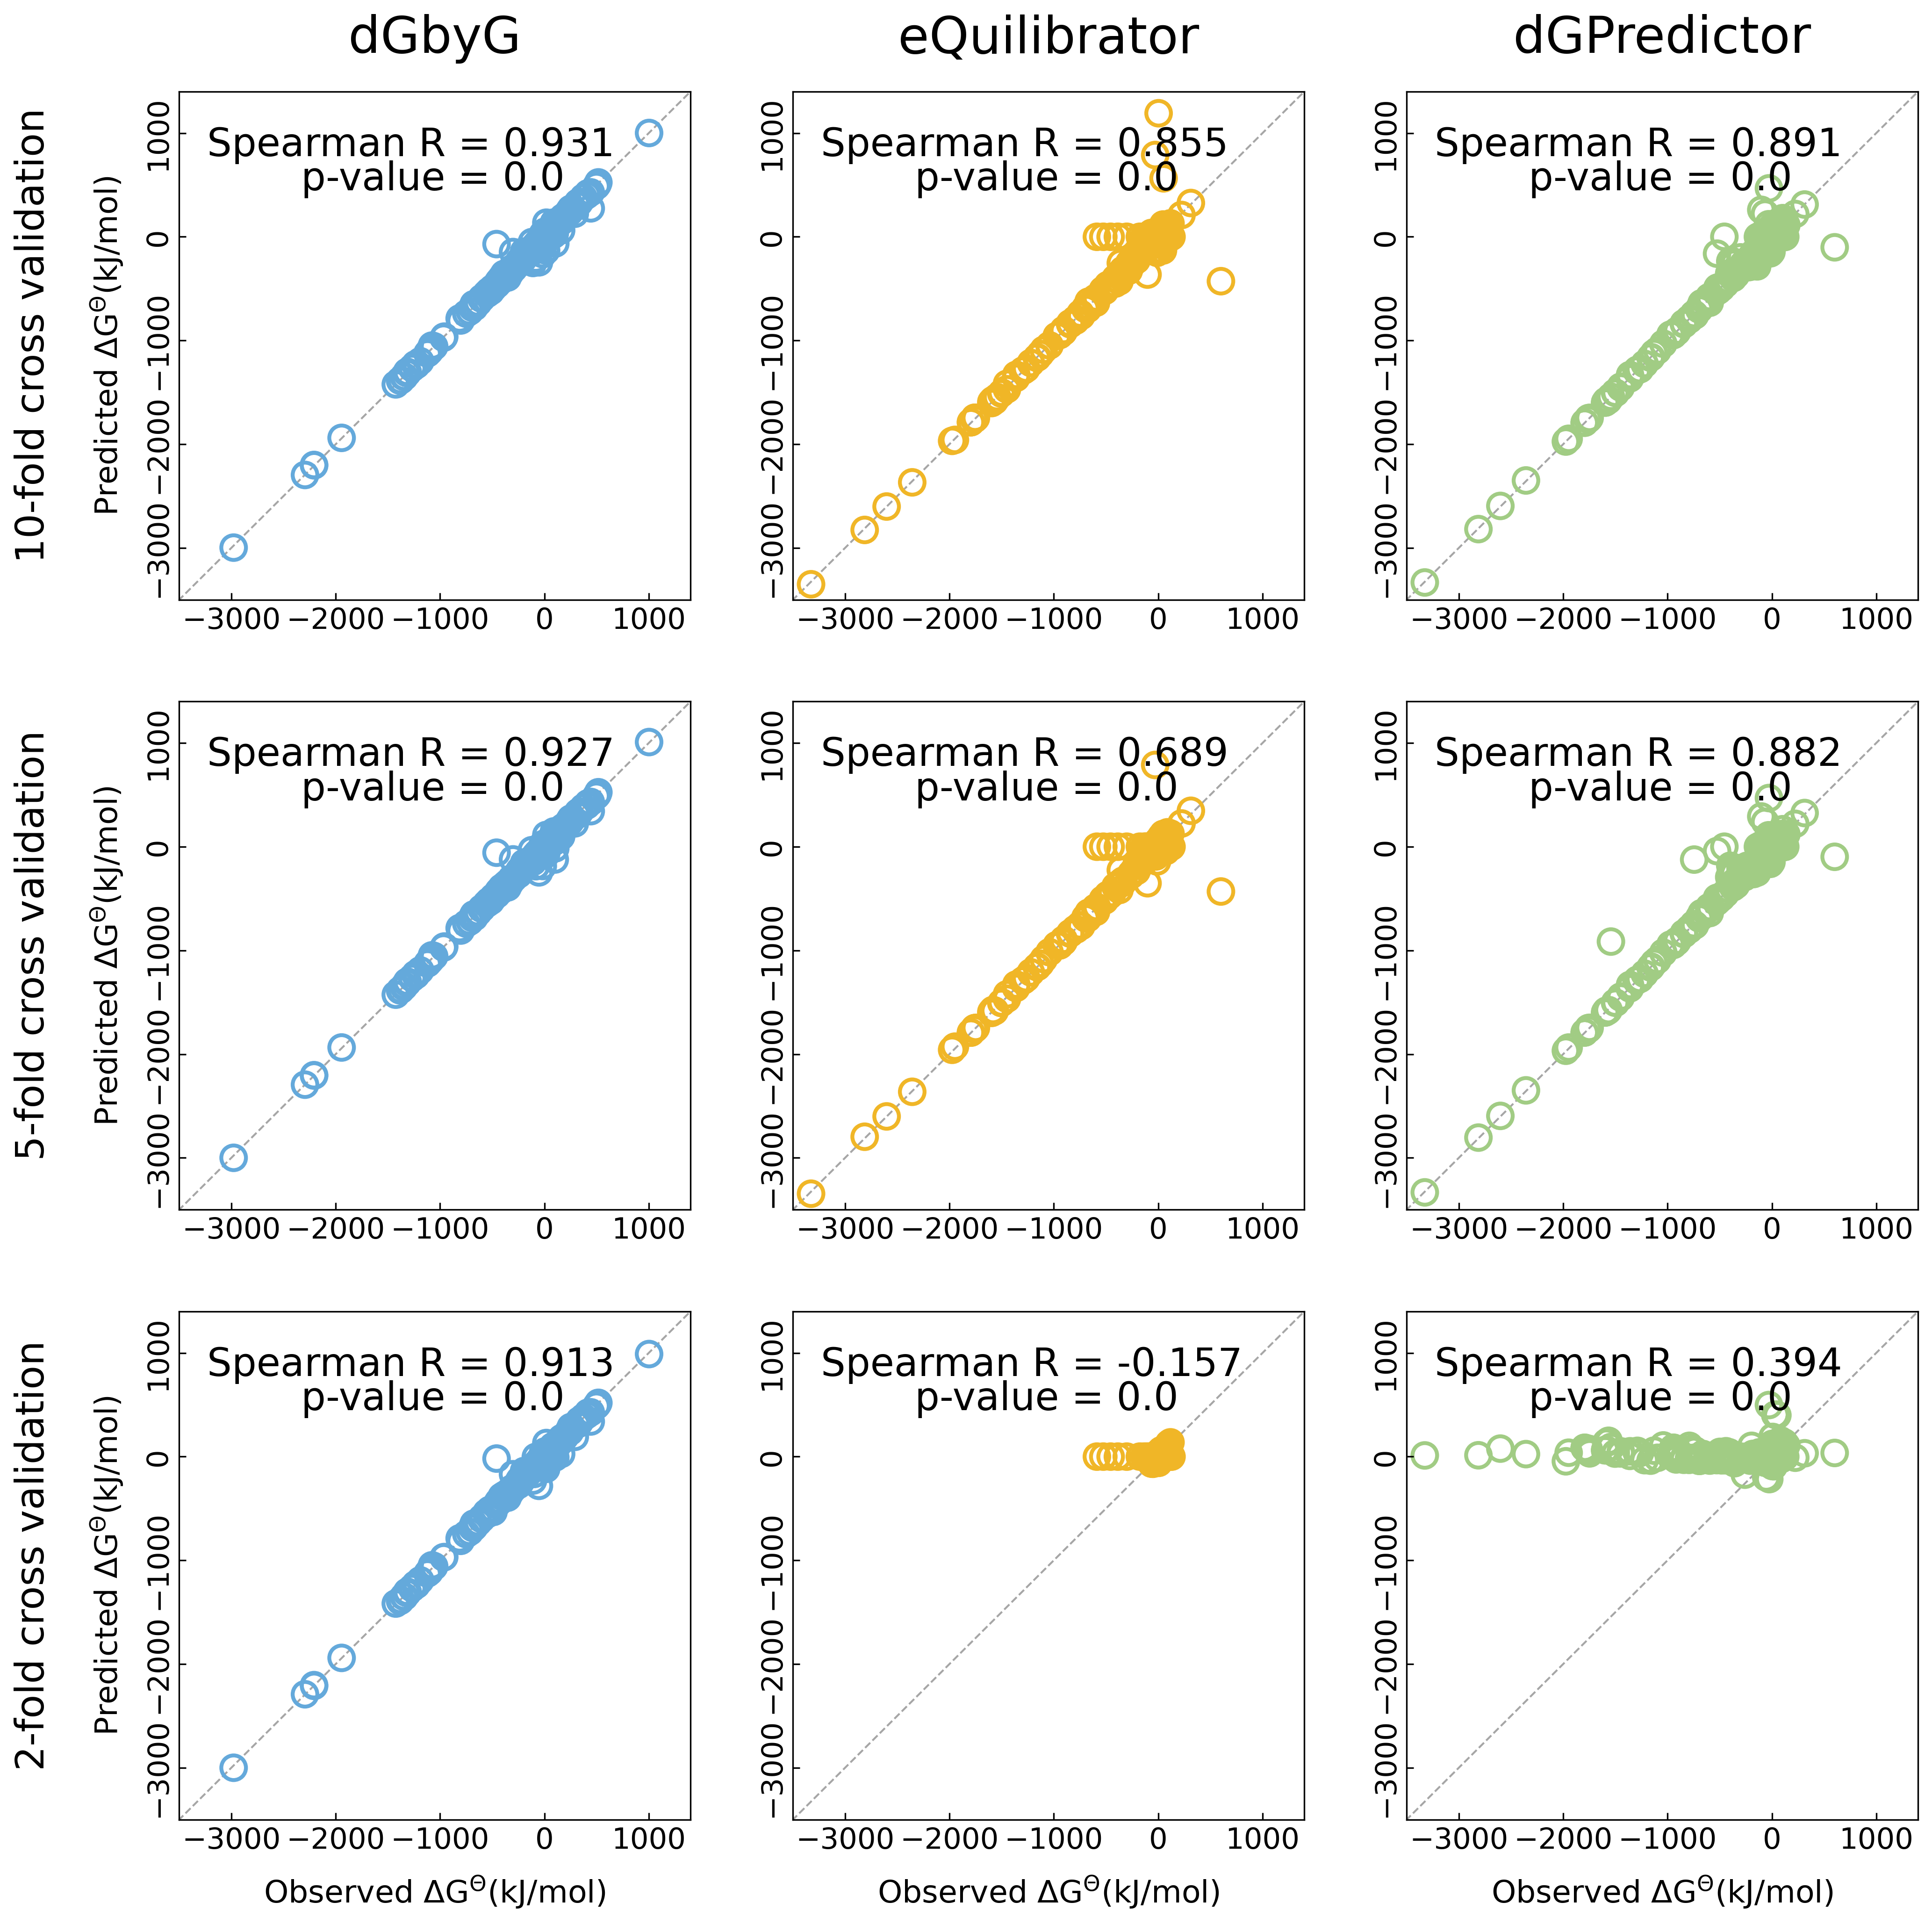

In [16]:
SR = []

plt.figure(dpi=300,figsize = (16,16))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
lable_fs = 16
title_fs = 26
text_fs = 20
R_x, R_y = (-3230, 780)
P_x, P_y = (-2330, 450)
ticks_fs = 15

# dGbyG 10-fold
plt.subplot(3,3,1)
plt.title('dGbyG', fontsize=title_fs, fontweight='normal', pad=20)
plt.text(s='10-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal',rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p)

plt.scatter(x=real_r, y=p, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y, linewidth = 2, color='gray', alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')
(255/256,134/256,250/256)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize = ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# dGbyG 5-fold
plt.subplot(3,3,4)
plt.text(s='5-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal', rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p_5)

plt.scatter(x=real_r, y=p_5, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# dGbyG 2-fold
plt.subplot(3,3,7)
plt.text(s='2-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal', rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p_2)

plt.scatter(x=real_r, y=p_2, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)
plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# CC 10-fold
plt.subplot(3,3,2)
plt.title('eQuilibrator', fontsize=title_fs, fontweight='normal',pad=20)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['10 fold CV'])

plt.scatter(x=cc_r, y=cc['10 fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# CC 5-fold CV
plt.subplot(3,3,5)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['5 fold CV'])

plt.scatter(x=cc_r, y=cc['5 fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])


# CC 2-fold CV
plt.subplot(3,3,8)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['2 fold CV'])

plt.scatter(x=cc_r, y=cc['2 fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

SR.append(sr[0])


# AF 10-fold CV
plt.subplot(3,3,3)
plt.title('dGPredictor', fontsize=title_fs, fontweight='normal',pad=20)

fit_y, pr, sr = rapid_linear_reg(af_r, af['10 fold CV'])

plt.scatter(x=af_r, y=af['10 fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(af_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# AF 5-fold CV
plt.subplot(3,3,6)

fit_y, pr, sr = rapid_linear_reg(af_r, af['5 fold CV'])

plt.scatter(x=af_r, y=af['5 fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])


# AF 2-fold CV
plt.subplot(3,3,9)

fit_y, pr, sr = rapid_linear_reg(af_r, af['2 fold CV'])

plt.scatter(x=af_r, y=af['2 fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

SR.append(sr[0])


plt.show()

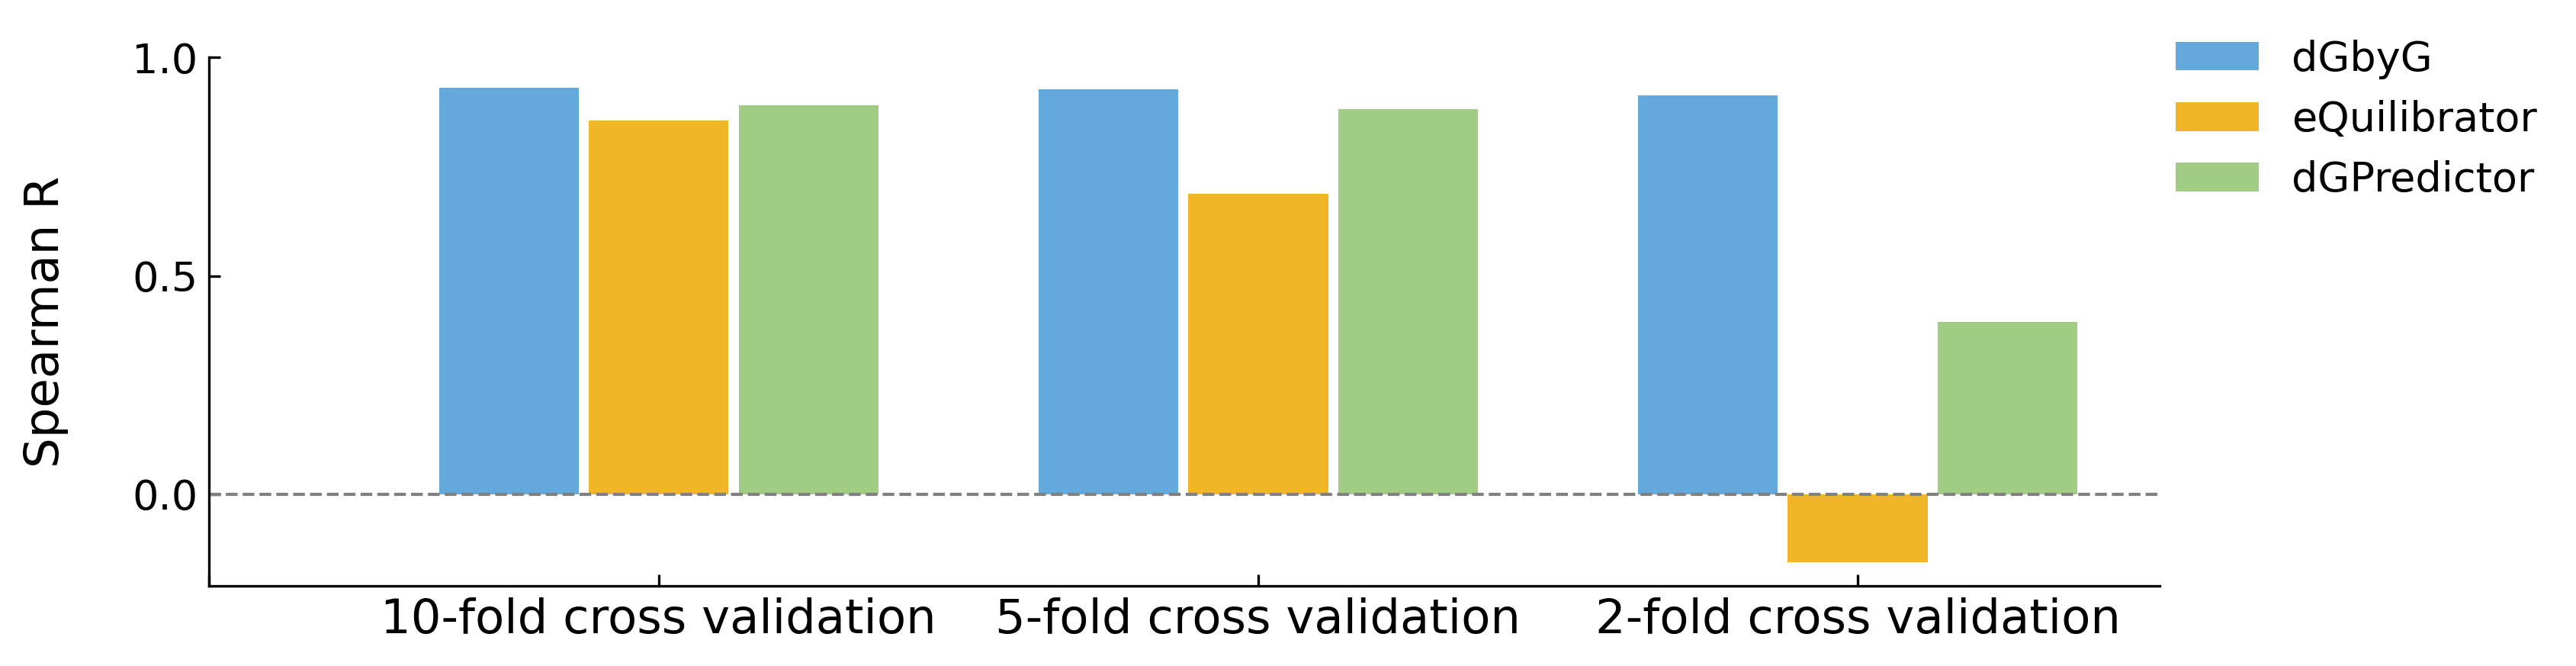

In [17]:
plt.figure(dpi=300,figsize = (11,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

colors = [color1,color2,color3,]
n = len(colors)

bar_width = 1.4/n

for i in range(n):
    center_point = 1.5 * ((2 * i + 1) / (2 * n) - 0.5)
    plt.bar(x=[1+center_point, 3+center_point, 5+center_point],height=SR[3*i:3*(i+1)], color=colors[i], edgecolor='none', width=bar_width, alpha=1, align='center')
#plt.bar(x=[1.02,3.02,5.02],height=R[3:6], color=color2, edgecolor='black', width=bar_width-0.02, alpha=0.6, align='edge')
#plt.bar(x=[1,2,3,4,5,6],height=R[6:9], color=color3)

#plt.ylabel(r'Median Absolute Error (kJ/mol)', fontsize=20)
plt.ylabel(r'Spearman R', fontsize = 15, labelpad=20)

plt.yticks([0, 0.5, 1.0], fontsize= 13)
plt.xticks([-0.5, 1,3,5], [None, '10-fold cross validation', '5-fold cross validation', '2-fold cross validation'], fontsize=15)

plt.legend(['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize = 13, frameon=False, loc=(1,0.7))

plt.axhline(y=0, linestyle='--', c='gray', linewidth=1)

plt.show()

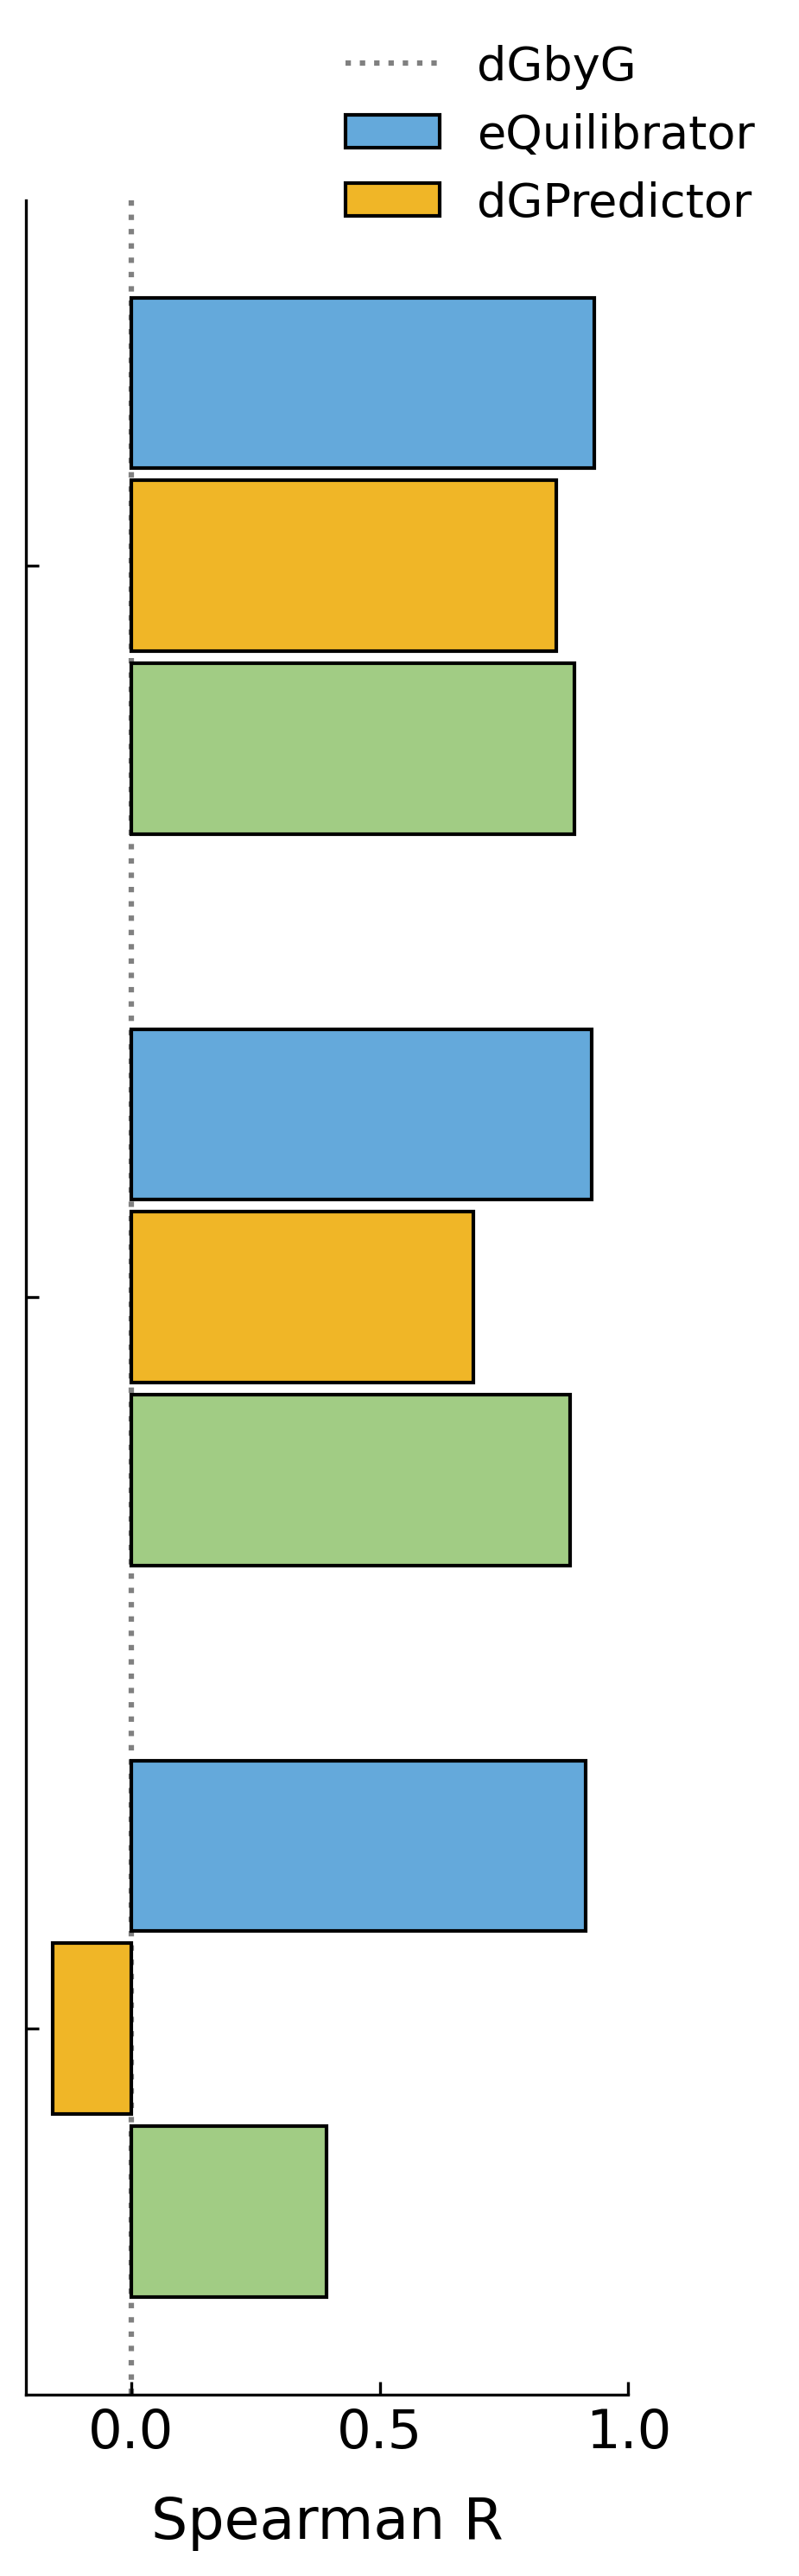

In [18]:
plt.figure(dpi=300,figsize = (3,11))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()
#ax.xaxis.set_ticks_position('top')
#ax.xaxis.set_label_position('top')
ax.set_xlabel

plt.plot([0,0],[0,6], linestyle=':', c='gray', zorder=0)
for i in range(n):
    center_point = 1.5 * ((2 * i + 1) / (2 * n) - 0.5)
    plt.barh(y=[1+center_point, 3+center_point, 5+center_point], width=SR[3*i:3*(i+1)], color=colors[i], edgecolor='black', height=bar_width, alpha=1, align='center')

plt.legend(['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize = 13, frameon=False, loc=(0.5,0.98))


plt.ylim(6,0)
plt.xlabel(r'Spearman R', fontsize =lable_fs, labelpad=10)

plt.xticks([0, 0.5, 1.0], fontsize=ticks_fs)
plt.yticks([1,3,5], [None,None,None], fontsize=13, rotation=90, va='center')


plt.show()

In [201]:
print('reverse K-fold cross validation')
reverse_cv = []
for K in range(3,6):
    results_dir = '../data/results_data/cross_validation_results/reverse_{0}_fold_cross_validation/'.format(K)
    print('K =', K)
    h = read_results(results_dir, 10)
    x = (np.median(h[3], axis=1).mean(), np.mean(h[3], axis=1).mean(), np.sqrt(np.mean(h[3]**2, axis=1)).mean())
    print(x)
    calculate_statistics(h[0], h[1])
    reverse_cv.append(h[:2])

reverse K-fold cross validation
K = 3
(5.719724154888844, 12.426637715463647, 30.56575617548372)
Medain of absolute error: 5.626681999999988
Mean of absolute error: 11.817494779948168
RMSE: 29.603193058059812
K = 4
(6.319341297862943, 15.373426232592852, 35.44524466085073)
Medain of absolute error: 6.02423948923877
Mean of absolute error: 14.455680246161156
RMSE: 33.67560689527923
K = 5
(7.308494736210906, 17.147329568520476, 37.46540450585764)
Medain of absolute error: 6.924943764705924
Mean of absolute error: 16.25122524706397
RMSE: 35.66635660047846


In [30]:
print('K-fold cross validation')
cv = []
for K in [10,5,2]:
    results_dir = '../data/results_data/cross_validation_results/{0}_fold_cross_validation/'.format(K)
    print('K =', K)
    cv.append(read_results(results_dir, 10))

K-fold cross validation
K = 10
Medain of absolute error: 4.1936743199153685
Mean of absolute error: 9.33667250406282
RMSE: 26.34087167192564
K = 5
Medain of absolute error: 4.415867673671189
Mean of absolute error: 9.692532636191368
RMSE: 26.723422133998515
K = 2
Medain of absolute error: 5.062365560659988
Mean of absolute error: 11.286744666837379
RMSE: 29.49424883034208


EC cross validation

/tmp/ipykernel_2232411/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)


Medain of absolute error: 9.431709219729346
Mean of absolute error: 15.823778492759635
RMSE: 25.12921835843347
The linear model is: Y = -6.4406 + 0.70203X
PearsonRResult(statistic=0.3833947008355727, pvalue=2.603462341003565e-17)
SignificanceResult(statistic=0.4614631878155054, pvalue=2.8558704864845914e-25)


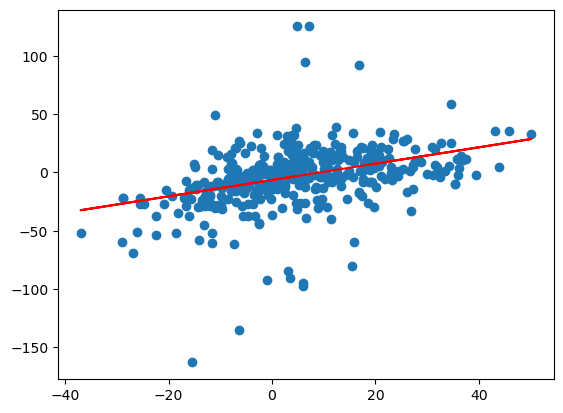

In [4]:
results_dir = '../data/results_data/cross_validation_results/formation2reaction_cross_validation/'
real_r_f2r, Final_p_f2r, Final_e_f2r, Final_ae_f2r = read_results(results_dir, 20)
real_r_f2r, p_f2r = calculate_statistics(real_r_f2r, Final_p_f2r)
py_f2r, pr_f2r, sr_f2r = rapid_linear_reg(real_r_f2r, p_f2r, plot=True)

Medain of absolute error: 266.33469640749996
Mean of absolute error: 432.35289750411124
RMSE: 646.9391324175266
The linear model is: Y = -17.33 + -0.016891X
PearsonRResult(statistic=-0.11589096581205016, pvalue=0.0849250214570361)
SignificanceResult(statistic=-0.13162066228220748, pvalue=0.050164133638083516)


/tmp/ipykernel_2232411/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)


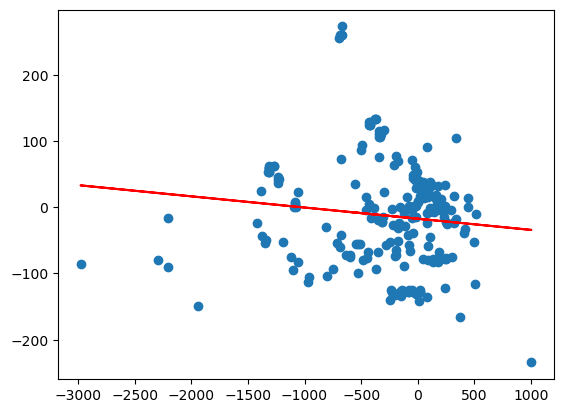

In [16]:
results_dir = '../data/results_data/cross_validation_results/reaction2formation_cross_validation/'
real_r_r2f, Final_p_r2f, Final_e_r2f, Final_ae_r2f = read_results(results_dir, 20)
real_r_r2f, p_r2f = calculate_statistics(real_r_r2f, Final_p_r2f)
py_r2f, pr_r2f, sr_r2f = rapid_linear_reg(real_r_r2f, p_r2f, plot=True)

In [6]:
ec_res_dir = ['../data/results_data/cross_validation_results/EC{0}_cross_validation/'.format(ec) for ec in range(1,7)]
ec_res = [read_results(dir, 10) for dir in ec_res_dir]
real_r_ec = ec_res[0][0]
Final_p_ec = [np.nanmean(ec[1], axis=0) for ec in ec_res]
real_r_ec, p_ec = calculate_statistics(real_r_ec, Final_p_ec[1:])
print()
Final_p_ec = [np.nanmean(ec[1], axis=0) for ec in ec_res]
real_r_ec, p_ec = calculate_statistics(real_r_ec, Final_p_ec)

Medain of absolute error: 4.318261299995474
Mean of absolute error: 7.755953844603102
RMSE: 15.966788198447208

Medain of absolute error: 6.990480821249973
Mean of absolute error: 18.402855311598234
RMSE: 29.301377232184393


/tmp/ipykernel_3923468/2098550994.py:4: RuntimeWarning: Mean of empty slice
  Final_p_ec = [np.nanmean(ec[1], axis=0) for ec in ec_res]
/tmp/ipykernel_3923468/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)
/tmp/ipykernel_3923468/2098550994.py:7: RuntimeWarning: Mean of empty slice
  Final_p_ec = [np.nanmean(ec[1], axis=0) for ec in ec_res]


The linear model is: Y = -0.67971 + 0.93635X
PearsonRResult(statistic=0.5579636122201335, pvalue=3.1046301743670024e-28)
SignificanceResult(statistic=0.6724929157733919, pvalue=1.6035181411712747e-44)


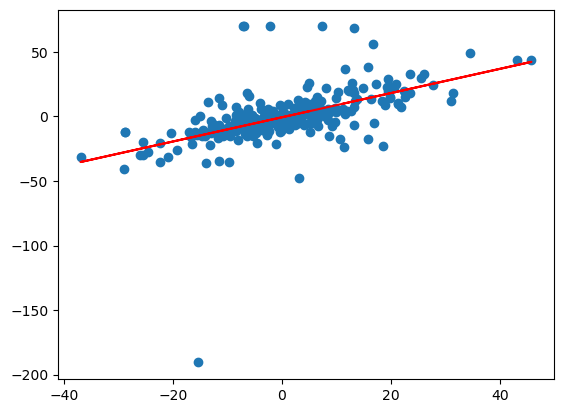

In [72]:
py_ec, pr_ec, sr_ec = rapid_linear_reg(real_r_ec, p_ec, plot=True)

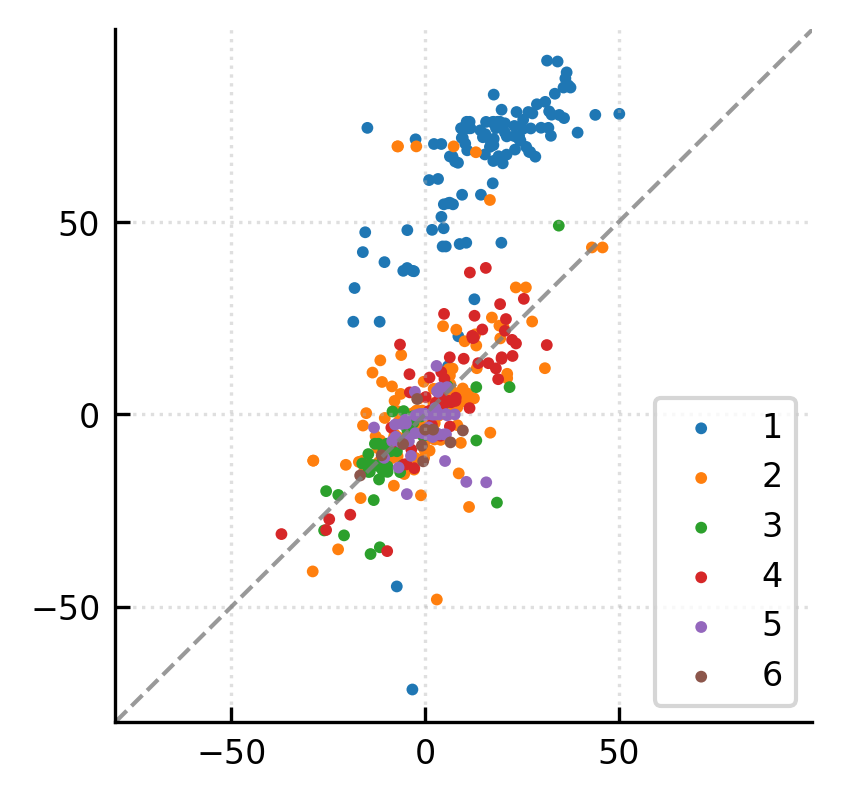

In [106]:
plt.figure(dpi=300,figsize = (3,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_position(('data', 0))
#ax.spines['bottom'].set_position(('data', 0))
#ax.xaxis.set_ticks_position('top')
#ax.xaxis.set_label_position('top')
ax.set_xlabel

plt.grid(alpha=0.4, linestyle=':')
for i in range(6):
    plt.scatter(real_r_ec, Final_p_ec[i], alpha=1, s=8, edgecolors='none')

plt.xticks([-50,0,50], fontsize=8)
plt.yticks([-50,0,50], fontsize=8)
plt.legend(list(range(1,7)), fontsize=8, loc='lower right')

plt.plot([-100,100], [-100,100], linewidth=1, linestyle='--', color='gray', alpha=0.8)

plt.xlim(-80,100)
plt.ylim(-80,100)
plt.show()

Medain of absolute error: 52.04261969320123
Mean of absolute error: 50.44062278740184
RMSE: 52.683578819463484
The linear model is: Y = 46.55 + 1.1278X
PearsonRResult(statistic=0.6125127189484136, pvalue=2.739962847068616e-13)
SignificanceResult(statistic=0.7055038077313798, pvalue=9.407641364932735e-19)


/tmp/ipykernel_2232411/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)


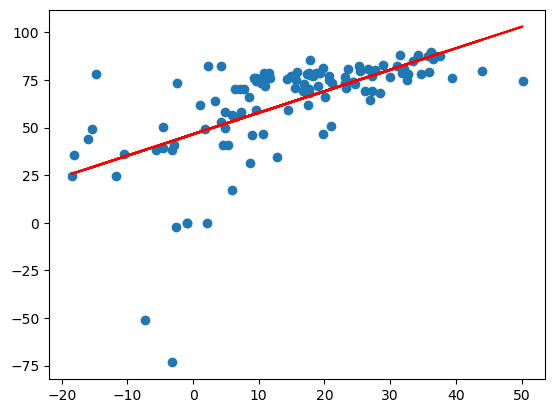


Medain of absolute error: 4.5999189718594025
Mean of absolute error: 8.518811740395556
RMSE: 15.669411850739467
The linear model is: Y = 1.9482 + 0.77618X
PearsonRResult(statistic=0.5065501161996815, pvalue=6.878080530533837e-11)
SignificanceResult(statistic=0.5970614859177388, pvalue=1.807675325185374e-15)


/tmp/ipykernel_2232411/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)


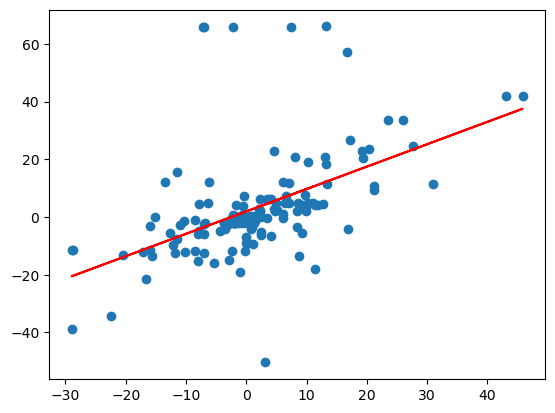


Medain of absolute error: 4.107946547517733
Mean of absolute error: 6.186963824539953
RMSE: 10.008913314232307
The linear model is: Y = -4.0097 + 0.84896X
PearsonRResult(statistic=0.7248582383633433, pvalue=3.880886809808573e-09)
SignificanceResult(statistic=0.6836747730308207, pvalue=6.15677630715184e-08)


/tmp/ipykernel_2232411/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)


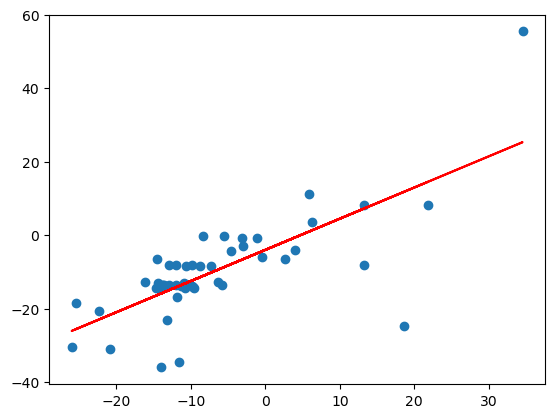


Medain of absolute error: 5.717134309442779
Mean of absolute error: 7.7831321071811015
RMSE: 9.926322676122908
The linear model is: Y = -0.037778 + 1.0148X
PearsonRResult(statistic=0.7994540417720565, pvalue=5.3077616680462404e-14)
SignificanceResult(statistic=0.7739087637269679, pvalue=1.0528240364128604e-12)


/tmp/ipykernel_2232411/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)


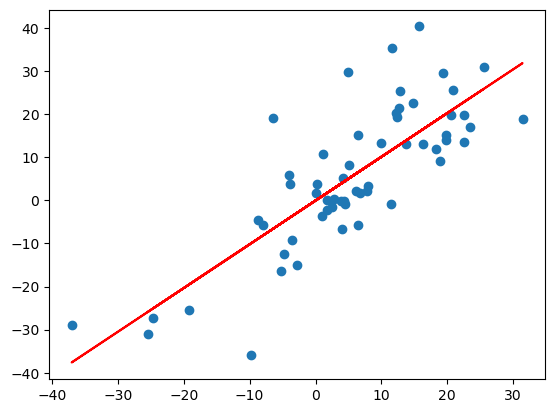


Medain of absolute error: 2.916009125673897
Mean of absolute error: 7.55544062045366
RMSE: 23.26931606242403
The linear model is: Y = -5.3077 + 1.7389X
PearsonRResult(statistic=0.37668996386295217, pvalue=0.001982567578980059)
SignificanceResult(statistic=0.34258925370014964, pvalue=0.005213679351493872)


/tmp/ipykernel_2232411/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)


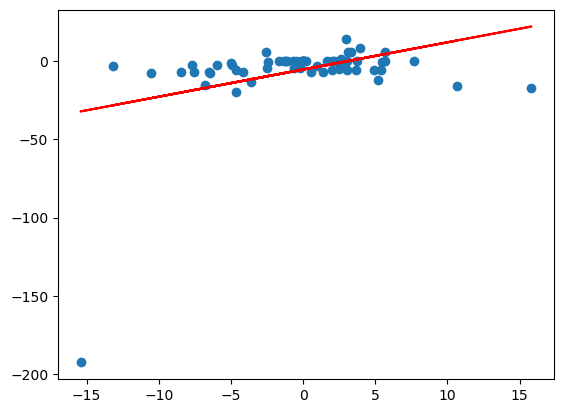


Medain of absolute error: 6.357635253558218
Mean of absolute error: 6.677478694387337
RMSE: 8.176125743871822
The linear model is: Y = -5.983 + 0.36157X
PearsonRResult(statistic=0.5040336207574553, pvalue=0.13742085037543134)
SignificanceResult(statistic=0.5151515151515151, pvalue=0.12755286970323426)


/tmp/ipykernel_2232411/4253966068.py:24: RuntimeWarning: Mean of empty slice
  p = np.nanmean(Final_p, axis=0)


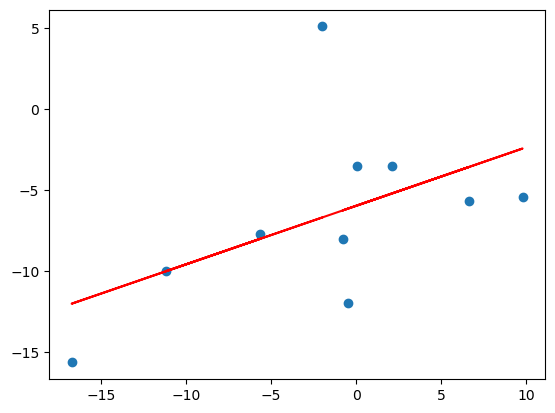

In [21]:
for ec in range(1,7):
    results_dir = '../data/results_data/cross_validation_results/EC{0}_cross_validation/'.format(ec)
    real_r_ec, Final_p_ec, Final_e_ec, Final_ae_ec = read_results(results_dir, 3)
    real_r_ec, p_ec = calculate_statistics(real_r_ec, Final_p_ec)
    py_ec, pr_ec, sr_ec = rapid_linear_reg(real_r_ec, p_ec, plot=True)
    print()

The linear model is: Y = -3.0541 + 0.99404X
PearsonRResult(statistic=0.9961124822584856, pvalue=0.0)
SignificanceResult(statistic=0.8690030097855889, pvalue=8.011985220473567e-208)


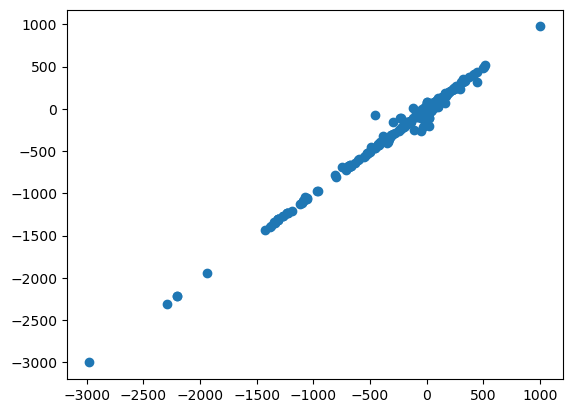

The linear model is: Y = -1.8739 + 0.99578X
PearsonRResult(statistic=0.9950375117048668, pvalue=0.0)
SignificanceResult(statistic=0.8221951368097905, pvalue=7.390944839884569e-167)


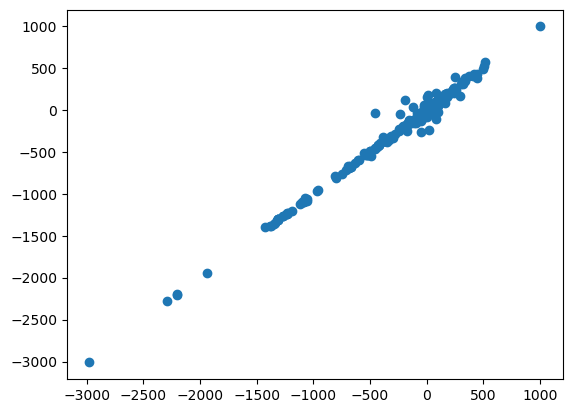

The linear model is: Y = -1.3818 + 0.99915X
PearsonRResult(statistic=0.9926674848147493, pvalue=0.0)
SignificanceResult(statistic=0.8516155578794623, pvalue=5.758660244305967e-191)


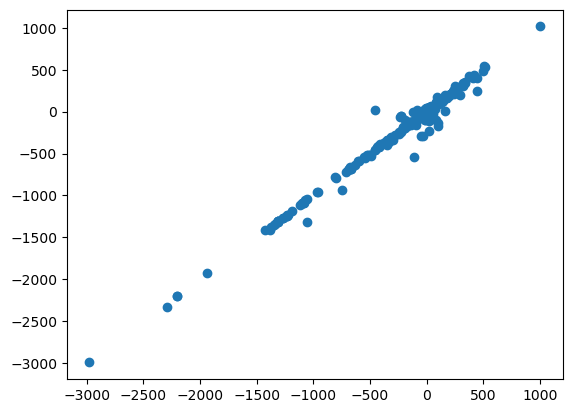

The linear model is: Y = -8.5558 + 0.99132X
PearsonRResult(statistic=0.9923157621164487, pvalue=0.0)
SignificanceResult(statistic=0.8193021270310904, pvalue=9.923961345939964e-165)


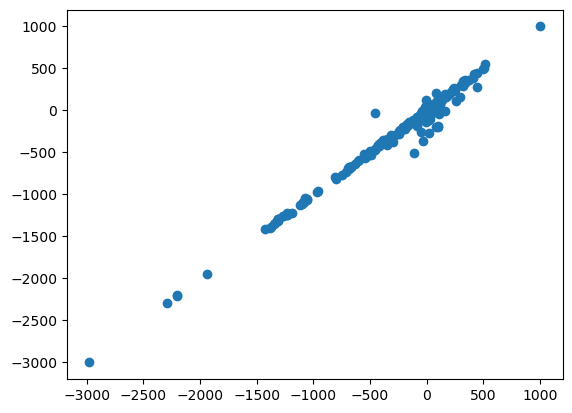

The linear model is: Y = -4.277 + 0.98585X
PearsonRResult(statistic=0.9923019997752387, pvalue=0.0)
SignificanceResult(statistic=0.8295028445868666, pvalue=2.0728286887216787e-172)


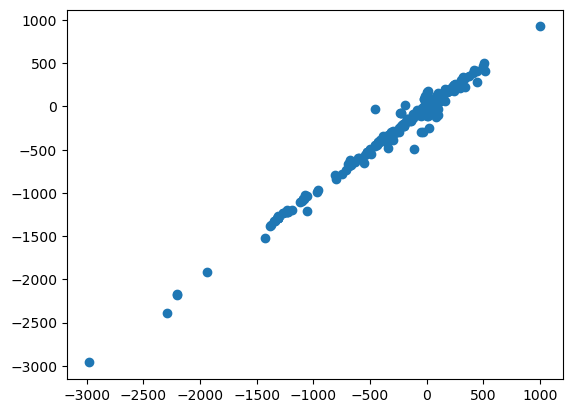

The linear model is: Y = -7.0668 + 0.98985X
PearsonRResult(statistic=0.9934690646897701, pvalue=0.0)
SignificanceResult(statistic=0.8373765370396762, pvalue=1.072526506738441e-178)


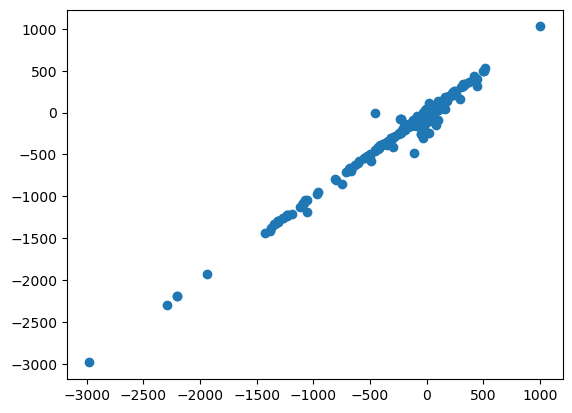

The linear model is: Y = -6.6119 + 1.001X
PearsonRResult(statistic=0.9892570499770946, pvalue=0.0)
SignificanceResult(statistic=0.8006681444957952, pvalue=6.99770671867786e-152)


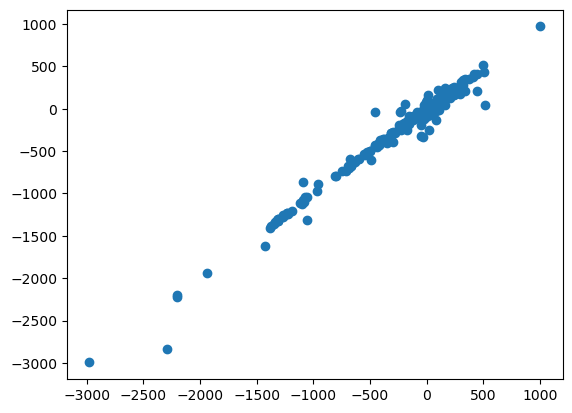

In [15]:
for k_cv in reverse_cv:
    rapid_linear_reg(k_cv[0]-k_cv[1], k_cv[0])
    plt.scatter(k_cv[0]-k_cv[1], k_cv[0])
    plt.show()

Reading Recon3D transformed standard dGr prime 

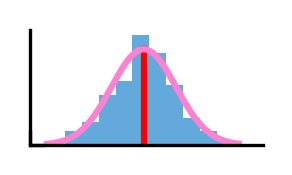

In [ ]:
from scipy.stats import norm
ps = Final_p.T[600]

plt.figure(dpi=300, figsize=(1,0.5))
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hist(ps, bins=10, density=True, color=color1)

interval = ps.std()*6
x = np.array([interval/100*i + (ps.mean()-interval/2) for i in range(100)])
y = norm.pdf(x ,ps.mean(), ps.std())

plt.plot([ps.mean(),ps.mean()], [0,max(y)], color='red')
plt.plot(x, y, color=color4, alpha=1)

plt.xticks([-30], [None])
plt.yticks([0], [None])
plt.xlim(-30,-19)
plt.show()

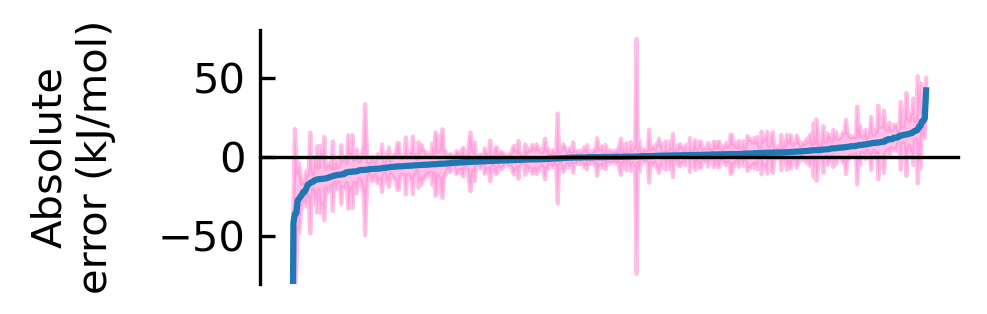

0.8915929203539823


In [38]:
df = pd.DataFrame(data=[real_r.to_numpy(), p, p-real_r, np.std(Final_p, axis=0), np.std(R, axis=0)]).T.iloc[223:,:]
df = df.sort_values(by=2)

plt.figure(dpi=300, figsize=(3,1.1))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))


plt.plot(range(df.shape[0]), df.iloc[:,2])
#plt.plot(range(df.shape[0]), df.iloc[:,2]+df.iloc[:,3]*2+10, color=color4)
#plt.plot(range(df.shape[0]), df.iloc[:,2]-df.iloc[:,3]*2-10, color=color3)
plt.fill_between(range(df.shape[0]), df.iloc[:,2]+df.iloc[:,3]*2+df.iloc[:,4]*2, df.iloc[:,2]-df.iloc[:,3]*2-df.iloc[:,4]*2,color=color4, alpha=0.5)

plt.ylabel('Absolute\nerror (kJ/mol)'.format(chr(920)), fontsize=10, labelpad=10)

plt.ylim(-80,80)
plt.xticks([])
plt.show()

print(sum(abs(df.iloc[:,2]<=df.iloc[:,3]*2+df.iloc[:,4]*2))/df.shape[0])